In [24]:
# 导入所需的库
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score,precision_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

乳腺癌诊断

In [25]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\wisc_bc_data.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [26]:
# 数据预处理
change = data.select_dtypes(exclude=[np.number]).columns
if change.any():
    data = data[[col for col in data if col not in change] + [change[0]]]
    print("类别已移到最后一列。")
    data = data.drop('id', axis=1)#由于第一列为无关变量id，删去第一列
    display(data.head(10).style.set_properties(**{'border': '1px solid black'}))

类别已移到最后一列。


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,M
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,M
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,M
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,M
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,M
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400,M
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,M
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,M
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200,M
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500,M


In [27]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

print("特征和目标变量已分离。")

# 特征可视化
print("特征：")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y).head(10).style.set_properties(**{'border': '1px solid black'}))


特征和目标变量已分离。
特征：


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


目标变量：


,diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [28]:
# 如果目标变量是类别型的，需要将其编码为数字
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("目标变量已编码为数字。")

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y, columns=['Encoded Target']).head(10).style.set_properties(**{'border': '1px solid black'}))
 

mapping_df = pd.DataFrame(list(le.classes_), columns=['Original Category'])
mapping_df['Encoded Category'] = le.transform(le.classes_)
print("类别编码映射：")
display(mapping_df.style.set_properties(**{'border': '1px solid black'}))

目标变量已编码为数字。
目标变量：


,Encoded Target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


类别编码映射：


,Original Category,Encoded Category
0,B,0
1,M,1


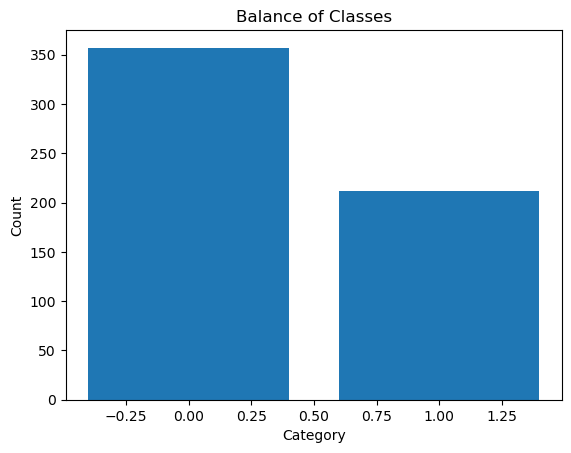

In [29]:
value_counts = pd.Series(y).value_counts()

# 创建一个条形图
plt.bar(value_counts.index, value_counts.values)

# 添加标签和标题
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balance of Classes')

# 显示图表
plt.show()


In [30]:
# 处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))


缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [31]:
#用StandardScaler 类来进行特征缩放，将所有特征的取值范围都缩放到均值为 0，标准差为 1 的范围内
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,1.890005,-0.255070,-0.592662,-0.321304,-0.289258,0.156347,0.445544,0.160025,-0.069124,0.134119,0.486846,-0.165498,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,-0.762332,0.149883,-0.804940,0.155410,0.298627,-0.909030,-0.651568,-0.310141,-0.228089,-0.829666,-0.611218,1.368983,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,1.660353,0.643623,0.290561,0.490051,0.233722,0.588031,0.268933,-0.232554,0.435349,-0.688004,0.611669,0.163763,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,1.572462,-0.356850,-0.389818,-0.227743,-0.352403,-0.436677,0.533290,0.120568,0.075243,0.107482,-0.017363,-0.161357,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,2.783096,-0.388250,0.693345,-0.409420,-0.360764,0.036008,2.609587,1.509848,0.409395,-0.321136,2.377346,-0.244190,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.620015,2.370444,6.846856


In [37]:
# 划分训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)

In [24]:
# 定义参数范围，用GridSearchCV交叉验证
param_grid = {
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100,150,200,250,300,500],
    'max_depth': [1,2,3,4,5,6,7,8,10],
    'random_state': range(1, 101, 5)
}

# 创建随机森林分类器
clf = RandomForestClassifier()

# 创建GridSearchCV对象
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc_ovo', n_jobs=-1)

# 训练模型
grid_search.fit(Xtrain, ytrain)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 输出最佳模型在测试集上的评分
print("最佳模型评分: ", grid_search.score(Xtest, ytest))

最佳参数:  {'max_depth': 5, 'n_estimators': 20, 'random_state': 41}
最佳模型评分:  0.9844422525107605


模型的准确率为：0.9319371727748691
模型的精度为：0.9228286384976526
召回率为：0.930714968914395


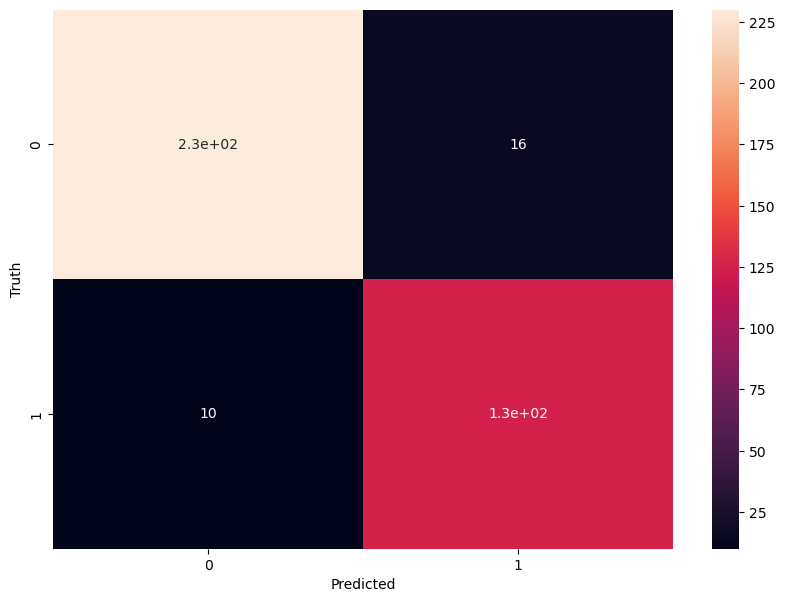

In [38]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=41)

# 训练模型
clf.fit(Xtrain, ytrain)

# 预测测试集
y_pred = clf.predict(Xtest)

# 计算准确率
accuracy = accuracy_score(ytest, y_pred)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, y_pred, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, y_pred, average='macro')

print(f'召回率为：{recall}')
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

字符识别

In [103]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\letterecognition.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [104]:
# 检查是否有非数字列，如果有，将其移到最后一列作为目标变量
change = data.select_dtypes(exclude=[np.number]).columns
if change.any():
    data = data[[col for col in data if col not in change] + [change[0]]]
    print("非数字列已移到最后一列。")
    display(data.head(10).style.set_properties(**{'border': '1px solid black'}))

非数字列已移到最后一列。


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,letter
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G
5,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,S
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,B
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7,A
8,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7,J
9,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8,M


In [105]:
# 分离特征和目标变量
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

print("特征和目标变量已分离。")

# 特征可视化
print("特征：")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y).head(10).style.set_properties(**{'border': '1px solid black'}))


特征和目标变量已分离。
特征：


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


目标变量：


,letter
0,T
1,I
2,D
3,N
4,G
5,S
6,B
7,A
8,J
9,M


In [106]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("目标变量已编码为数字。")

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y, columns=['Encoded Target']).head(10).style.set_properties(**{'border': '1px solid black'}))
 

mapping_df = pd.DataFrame(list(le.classes_), columns=['Original Category'])
mapping_df['Encoded Category'] = le.transform(le.classes_)
print("类别编码映射：")
display(mapping_df.style.set_properties(**{'border': '1px solid black'}))

目标变量已编码为数字。
目标变量：


,Encoded Target
0,19
1,8
2,3
3,13
4,6
5,18
6,1
7,0
8,9
9,12


类别编码映射：


,Original Category,Encoded Category
0,A,0
1,B,1
2,C,2
3,D,3
4,E,4
5,F,5
6,G,6
7,H,7
8,I,8
9,J,9


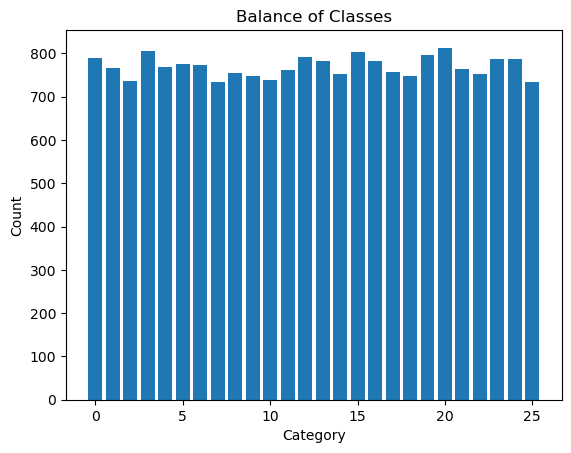

In [107]:
value_counts = pd.Series(y).value_counts()

# 创建一个条形图
plt.bar(value_counts.index, value_counts.values)

# 添加标签和标题
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balance of Classes')

# 显示图表
plt.show()


In [108]:
# 处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))


缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.000000,8.000000,3.000000,5.000000,1.000000,8.000000,13.000000,0.000000,6.000000,6.000000,10.000000,8.000000,0.000000,8.000000,0.000000,8.000000
1,5.000000,12.000000,3.000000,7.000000,2.000000,10.000000,5.000000,5.000000,4.000000,13.000000,3.000000,9.000000,2.000000,8.000000,4.000000,10.000000
2,4.000000,11.000000,6.000000,8.000000,6.000000,10.000000,6.000000,2.000000,6.000000,10.000000,3.000000,7.000000,3.000000,7.000000,3.000000,9.000000
3,7.000000,11.000000,6.000000,6.000000,3.000000,5.000000,9.000000,4.000000,6.000000,4.000000,4.000000,10.000000,6.000000,10.000000,2.000000,8.000000
4,2.000000,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,6.000000,6.000000,6.000000,5.000000,9.000000,1.000000,7.000000,5.000000,10.000000
5,4.000000,11.000000,5.000000,8.000000,3.000000,8.000000,8.000000,6.000000,9.000000,5.000000,6.000000,6.000000,0.000000,8.000000,9.000000,7.000000
6,4.000000,2.000000,5.000000,4.000000,4.000000,8.000000,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,2.000000,8.000000,7.000000,10.000000
7,1.000000,1.000000,3.000000,2.000000,1.000000,8.000000,2.000000,2.000000,2.000000,8.000000,2.000000,8.000000,1.000000,6.000000,2.000000,7.000000
8,2.000000,2.000000,4.000000,4.000000,2.000000,10.000000,6.000000,2.000000,6.000000,12.000000,4.000000,8.000000,1.000000,6.000000,1.000000,7.000000
9,11.000000,15.000000,13.000000,9.000000,7.000000,13.000000,2.000000,6.000000,2.000000,12.000000,1.000000,9.000000,8.000000,1.000000,1.000000,8.000000


In [109]:
#特征缩放
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.057698,0.291877,-1.053277,-0.164704,-1.144013,0.544130,2.365097,-1.714360,0.344994,-0.917071,1.347774,0.034125,-1.305948,-0.219082,-1.438153,0.122911
1,0.510385,1.502358,-1.053277,0.719730,-0.687476,1.531305,-1.075326,0.137561,-0.495072,1.895968,-1.312807,0.514764,-0.448492,-0.219082,0.120081,1.359441
2,-0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,-0.645273,-0.973591,0.344994,0.690380,-1.312807,-0.446513,-0.019764,-0.865626,-0.269477,0.741176
3,1.555774,1.199738,0.435910,0.277513,-0.230939,-0.936631,0.644886,-0.232823,0.344994,-1.720796,-0.932724,0.995402,1.266419,1.074008,-0.659036,0.122911
4,-1.057698,-1.826464,-1.053277,-1.933571,-1.144013,0.544130,-0.645273,0.507945,0.344994,-0.917071,-0.552641,0.514764,-0.877220,-0.865626,0.509640,1.359441
5,-0.012309,1.199738,-0.060486,1.161947,-0.230939,0.544130,0.214833,0.507945,1.605094,-1.318933,-0.172558,-0.927151,-1.305948,-0.219082,2.067874,-0.495354
6,-0.012309,-1.523844,-0.060486,-0.606921,0.225598,0.544130,-0.215220,0.507945,0.344994,-0.515208,-0.172558,-0.927151,-0.448492,-0.219082,1.288757,1.359441
7,-1.580393,-1.826464,-1.053277,-1.491354,-1.144013,0.544130,-2.365484,-0.973591,-1.335139,-0.113345,-1.692890,0.034125,-0.877220,-1.512171,-0.659036,-0.495354
8,-1.057698,-1.523844,-0.556881,-0.606921,-0.687476,1.531305,-0.645273,-0.973591,0.344994,1.494105,-0.932724,0.034125,-0.877220,-1.512171,-1.048594,-0.495354
9,3.646551,2.410218,3.910678,1.604164,1.595209,3.012066,-2.365484,0.507945,-1.335139,1.494105,-2.072973,0.514764,2.123874,-4.744894,-1.048594,0.122911


In [110]:
# 划分训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)

In [10]:
# 定义参数范围，用GridSearchCV交叉验证
param_grid = {
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100,150,200,250,300,500],
    'max_depth': [1,2,3,4,5,6,7,8,10],
    'random_state': range(1, 101, 5)
}

# 创建随机森林分类器
clf = RandomForestClassifier()

# 创建GridSearchCV对象
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc_ovo', n_jobs=-1)

# 训练模型
grid_search.fit(Xtrain, ytrain)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 输出最佳模型在测试集上的评分
print("最佳模型评分: ", grid_search.score(Xtest, ytest))

最佳参数:  {'max_depth': 10, 'n_estimators': 500, 'random_state': 36}
最佳模型评分:  0.9930096701696133


模型的准确率为：0.8545522388059702
模型的精度为：0.8693638728869248
召回率为：0.8536146415069559


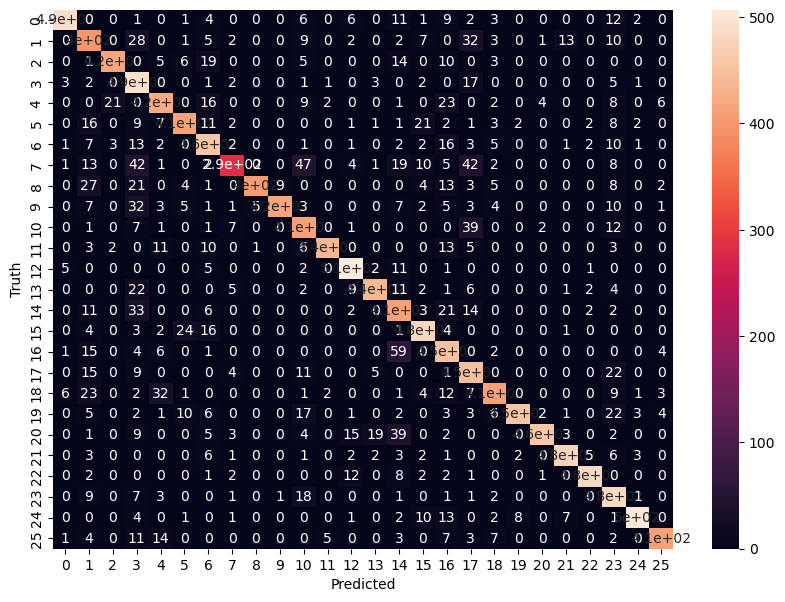

In [111]:
clf = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=36)

# 训练模型
clf.fit(Xtrain, ytrain)

# 预测测试集
y_pred = clf.predict(Xtest)

# 计算准确率
accuracy = accuracy_score(ytest, y_pred)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, y_pred, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, y_pred, average='macro')
print(f'召回率为：{recall}')
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

个人征信

In [124]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\credit.csv')

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,4,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,4,building society savings,53,none,own,1,skilled employee,1,none,yes,1
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,2,other,35,none,rent,1,mangement self-employed,1,yes,yes,1
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,1
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,2,other,28,none,own,2,mangement self-employed,1,none,yes,2


In [125]:
# 初始化标签编码器
label_encoder = LabelEncoder()

# 创建一个字典来记录每个原始标签到编码的映射
label_mappings = {}

# 对于数据中的每一个非数值型列，进行标签编码
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
    # 记录当前列的映射
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
# 输出映射关系
label_mappings


{'checking_balance': {'1 - 200 DM': 0,
  '< 0 DM': 1,
  '> 200 DM': 2,
  'unknown': 3},
 'credit_history': {'critical': 0,
  'delayed': 1,
  'fully repaid': 2,
  'fully repaid this bank': 3,
  'repaid': 4},
 'purpose': {'business': 0,
  'car (new)': 1,
  'car (used)': 2,
  'domestic appliances': 3,
  'education': 4,
  'furniture': 5,
  'others': 6,
  'radio/tv': 7,
  'repairs': 8,
  'retraining': 9},
 'savings_balance': {'101 - 500 DM': 0,
  '501 - 1000 DM': 1,
  '< 100 DM': 2,
  '> 1000 DM': 3,
  'unknown': 4},
 'employment_length': {'0 - 1 yrs': 0,
  '1 - 4 yrs': 1,
  '4 - 7 yrs': 2,
  '> 7 yrs': 3,
  'unemployed': 4},
 'personal_status': {'divorced male': 0,
  'female': 1,
  'married male': 2,
  'single male': 3},
 'other_debtors': {'co-applicant': 0, 'guarantor': 1, 'none': 2},
 'property': {'building society savings': 0,
  'other': 1,
  'real estate': 2,
  'unknown/none': 3},
 'installment_plan': {'bank': 0, 'none': 1, 'stores': 2},
 'housing': {'for free': 0, 'own': 1, 'rent': 2}

In [126]:
# 显示编码后的前10行数据
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,1,0,1,2
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,3,2,0,1,1
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,1,2,0,1,2
5,3,36,4,4,9055,4,1,2,3,2,4,3,35,1,0,1,3,2,1,1,1
6,3,24,4,5,2835,1,3,3,3,2,4,0,53,1,1,1,1,1,0,1,1
7,0,36,4,2,6948,2,1,2,3,2,2,1,35,1,2,1,0,1,1,1,1
8,3,12,4,7,3059,3,2,2,0,2,4,2,61,1,1,1,3,1,0,1,1
9,0,30,0,1,5234,2,4,4,2,2,2,1,28,1,1,2,0,1,0,1,2


In [127]:
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

print("特征和目标变量已分离。")

# 特征可视化
print("特征：")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y).head(10).style.set_properties(**{'border': '1px solid black'}))

特征和目标变量已分离。
特征：


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,1,0,1
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,3,2,0,1
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,1,2,0,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,1,2,0,1
5,3,36,4,4,9055,4,1,2,3,2,4,3,35,1,0,1,3,2,1,1
6,3,24,4,5,2835,1,3,3,3,2,4,0,53,1,1,1,1,1,0,1
7,0,36,4,2,6948,2,1,2,3,2,2,1,35,1,2,1,0,1,1,1
8,3,12,4,7,3059,3,2,2,0,2,4,2,61,1,1,1,3,1,0,1
9,0,30,0,1,5234,2,4,4,2,2,2,1,28,1,1,2,0,1,0,1


目标变量：


,default
0,1
1,2
2,1
3,1
4,2
5,1
6,1
7,1
8,1
9,2


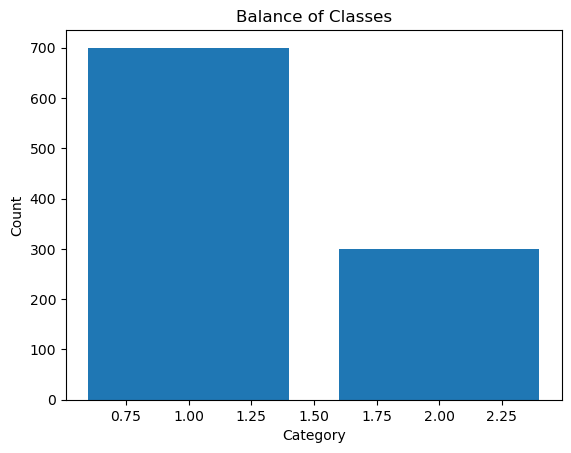

In [128]:
value_counts = pd.Series(y).value_counts()

# 创建一个条形图
plt.bar(value_counts.index, value_counts.values)

# 添加标签和标题
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balance of Classes')

# 显示图表
plt.show()

In [129]:
# 处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

缺失值已处理。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,6.000000,0.000000,7.000000,1169.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,2.000000,67.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
1,0.000000,48.000000,4.000000,7.000000,5951.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
2,3.000000,12.000000,0.000000,4.000000,2096.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,49.000000,1.000000,1.000000,1.000000,3.000000,2.000000,0.000000,1.000000
3,1.000000,42.000000,4.000000,5.000000,7882.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.000000,0.000000,45.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000
4,1.000000,24.000000,1.000000,1.000000,4870.000000,2.000000,1.000000,3.000000,3.000000,2.000000,4.000000,3.000000,53.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000
5,3.000000,36.000000,4.000000,4.000000,9055.000000,4.000000,1.000000,2.000000,3.000000,2.000000,4.000000,3.000000,35.000000,1.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000
6,3.000000,24.000000,4.000000,5.000000,2835.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,0.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
7,0.000000,36.000000,4.000000,2.000000,6948.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,35.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
8,3.000000,12.000000,4.000000,7.000000,3059.000000,3.000000,2.000000,2.000000,0.000000,2.000000,4.000000,2.000000,61.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000
9,0.000000,30.000000,0.000000,1.000000,5234.000000,2.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,28.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000


In [130]:
#特征缩放
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.464594,-1.236478,-1.352825,1.151303,-0.745131,1.669901,1.090469,0.918477,0.845685,0.301109,1.046987,0.641411,2.766456,0.218346,-0.133710,1.027079,-0.289639,-0.428290,1.214598,0.196014
1,-1.262865,2.248194,0.869475,1.151303,0.949817,-0.130531,-0.579468,-0.870183,-1.116461,0.301109,-0.765977,0.641411,-1.191404,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
2,1.131948,-0.738668,-1.352825,0.047818,-0.416562,-0.130531,0.255500,-0.870183,0.845685,0.301109,0.140505,0.641411,1.183312,0.218346,-0.133710,-0.704926,1.824516,2.334869,-0.823318,0.196014
3,-0.464594,1.750384,0.869475,0.415646,1.634247,-0.130531,0.255500,-0.870183,0.845685,-1.945974,1.046987,-1.356755,0.831502,0.218346,-2.016956,-0.704926,-0.289639,2.334869,-0.823318,0.196014
4,-0.464594,0.256953,-0.797250,-1.055668,0.566664,-0.130531,-0.579468,0.024147,0.845685,0.301109,1.046987,1.640495,1.535122,0.218346,-2.016956,1.027079,-0.289639,2.334869,-0.823318,0.196014
5,1.131948,1.252574,0.869475,0.047818,2.050009,1.669901,-0.579468,-0.870183,0.845685,0.301109,1.046987,1.640495,-0.048022,0.218346,-2.016956,-0.704926,1.824516,2.334869,1.214598,0.196014
6,1.131948,0.256953,0.869475,0.415646,-0.154629,-1.030748,1.090469,0.024147,0.845685,0.301109,1.046987,-1.356755,1.535122,0.218346,-0.133710,-0.704926,-0.289639,-0.428290,-0.823318,0.196014
7,-1.262865,1.252574,0.869475,-0.687839,1.303197,-0.130531,-0.579468,-0.870183,0.845685,0.301109,-0.765977,-0.357672,-0.048022,0.218346,1.749535,-0.704926,-1.346717,-0.428290,1.214598,0.196014
8,1.131948,-0.738668,0.869475,1.151303,-0.075233,0.769685,0.255500,-0.870183,-2.097535,0.301109,1.046987,0.641411,2.238742,0.218346,-0.133710,-0.704926,1.824516,-0.428290,-0.823318,0.196014
9,-1.262865,0.754763,-1.352825,-1.055668,0.695681,-0.130531,1.925438,0.918477,-0.135388,0.301109,-0.765977,-0.357672,-0.663689,0.218346,-0.133710,1.027079,-1.346717,-0.428290,-0.823318,0.196014


In [131]:
# 划分训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)

In [121]:
# 定义参数范围，用GridSearchCV交叉验证
param_grid = {
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100,150,200,250,300,500],
    'max_depth': [1,2,3,4,5,6,7,8,10],
    'random_state': range(1, 101, 5)
}

# 创建随机森林分类器
clf = RandomForestClassifier()

# 创建GridSearchCV对象
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc_ovo', n_jobs=-1)

# 训练模型
grid_search.fit(Xtrain, ytrain)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 输出最佳模型在测试集上的评分
print("最佳模型评分: ", grid_search.score(Xtest, ytest))


最佳参数:  {'max_depth': 10, 'n_estimators': 150, 'random_state': 56}
最佳模型评分:  0.7603351426407474


模型的准确率为：0.7417910447761195
模型的精度为：0.6974739947914315
召回率为：0.6379912480013465


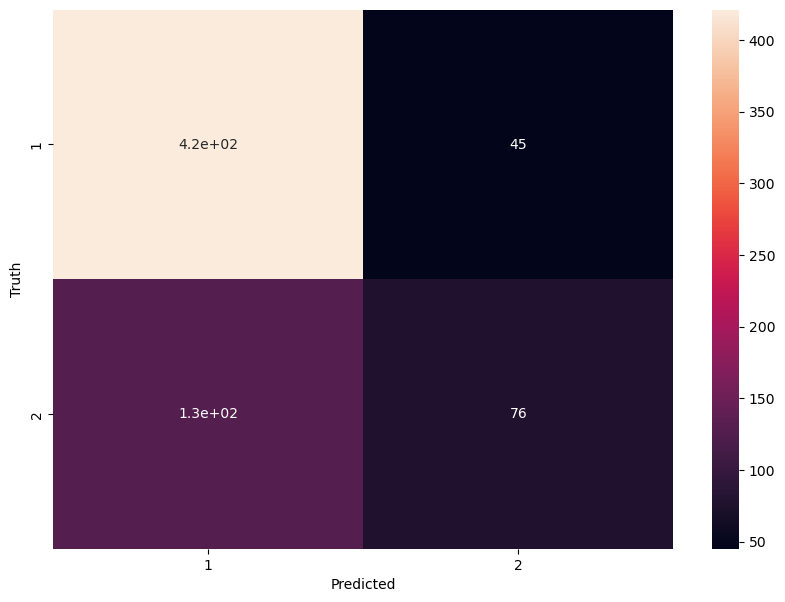

In [132]:
clf = RandomForestClassifier(n_estimators=150, max_depth=10,random_state=56)

# 训练模型
clf.fit(Xtrain, ytrain)

# 预测测试集
y_pred = clf.predict(Xtest)

# 计算准确率
accuracy = accuracy_score(ytest, y_pred)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, y_pred, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, y_pred, average='macro')
print(f'召回率为：{recall}')
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

玻璃类别

In [93]:
# 加载数据集
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\glass.csv',header=None)

# 使用样式
styled_data = data.head(10).style.set_properties(**{'border': '1px solid black'})
styled_data


,0,1,2,3,4,5,6,7,8,9,10
0,1,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000,1
1,2,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000,1
2,3,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000,1
3,4,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000,1
4,5,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000,1
5,6,1.515960,12.790000,3.610000,1.620000,72.970000,0.640000,8.070000,0.000000,0.260000,1
6,7,1.517430,13.300000,3.600000,1.140000,73.090000,0.580000,8.170000,0.000000,0.000000,1
7,8,1.517560,13.150000,3.610000,1.050000,73.240000,0.570000,8.240000,0.000000,0.000000,1
8,9,1.519180,14.040000,3.580000,1.370000,72.080000,0.560000,8.300000,0.000000,0.000000,1
9,10,1.517550,13.000000,3.600000,1.360000,72.990000,0.570000,8.400000,0.000000,0.110000,1


In [94]:
X = data.iloc[:, :-1]  # 特征
y = data.iloc[:, -1]  # 目标变量

print("特征和目标变量已分离。")

# 特征可视化
print("特征：")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

# 目标变量可视化
print("目标变量：")
display(pd.DataFrame(y).head(10).style.set_properties(**{'border': '1px solid black'}))

特征和目标变量已分离。
特征：


,0,1,2,3,4,5,6,7,8,9
0,1,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,2,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,3,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,4,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,5,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
5,6,1.515960,12.790000,3.610000,1.620000,72.970000,0.640000,8.070000,0.000000,0.260000
6,7,1.517430,13.300000,3.600000,1.140000,73.090000,0.580000,8.170000,0.000000,0.000000
7,8,1.517560,13.150000,3.610000,1.050000,73.240000,0.570000,8.240000,0.000000,0.000000
8,9,1.519180,14.040000,3.580000,1.370000,72.080000,0.560000,8.300000,0.000000,0.000000
9,10,1.517550,13.000000,3.600000,1.360000,72.990000,0.570000,8.400000,0.000000,0.110000


目标变量：


,10
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


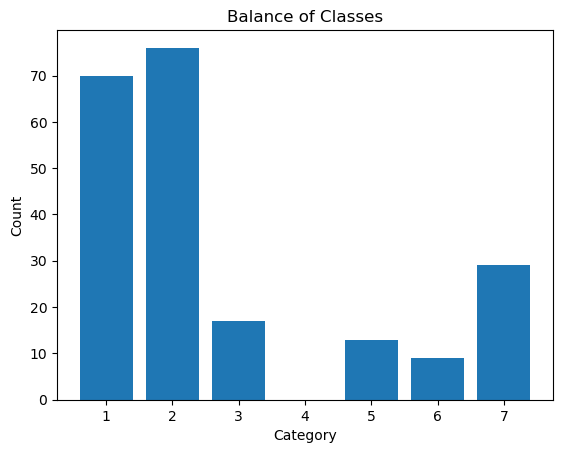

In [95]:
value_counts = pd.Series(y).value_counts()

# 创建一个条形图
plt.bar(value_counts.index, value_counts.values)

# 添加标签和标题
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Balance of Classes')

# 显示图表
plt.show()

In [96]:
# 处理缺失值
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
print("缺失值已处理。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

缺失值已处理。


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.521010,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.000000
1,2.000000,1.517610,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.000000
2,3.000000,1.516180,13.530000,3.550000,1.540000,72.990000,0.390000,7.780000,0.000000,0.000000
3,4.000000,1.517660,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.000000
4,5.000000,1.517420,13.270000,3.620000,1.240000,73.080000,0.550000,8.070000,0.000000,0.000000
5,6.000000,1.515960,12.790000,3.610000,1.620000,72.970000,0.640000,8.070000,0.000000,0.260000
6,7.000000,1.517430,13.300000,3.600000,1.140000,73.090000,0.580000,8.170000,0.000000,0.000000
7,8.000000,1.517560,13.150000,3.610000,1.050000,73.240000,0.570000,8.240000,0.000000,0.000000
8,9.000000,1.519180,14.040000,3.580000,1.370000,72.080000,0.560000,8.300000,0.000000,0.000000
9,10.000000,1.517550,13.000000,3.600000,1.360000,72.990000,0.570000,8.400000,0.000000,0.110000


In [97]:
#特征缩放
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("特征已缩放。")
display(pd.DataFrame(X).head(10).style.set_properties(**{'border': '1px solid black'}))

特征已缩放。


,0,1,2,3,4,5,6,7,8,9
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
5,-1.643038,-0.793931,-0.758384,0.643117,0.351521,0.412905,0.219689,-0.624699,-0.352877,2.088150
6,-1.626851,-0.308744,-0.132382,0.636168,-0.612137,0.568197,0.127475,-0.554268,-0.352877,-0.586451
7,-1.610663,-0.265836,-0.316500,0.643117,-0.792823,0.762313,0.112107,-0.504966,-0.352877,-0.586451
8,-1.594475,0.268859,0.775936,0.622270,-0.150384,-0.738850,0.096738,-0.462707,-0.352877,-0.586451
9,-1.578288,-0.269137,-0.500618,0.636168,-0.170460,0.438787,0.112107,-0.392276,-0.352877,0.545111


In [100]:
# 划分训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.67, random_state=42)

In [38]:
# 定义参数范围，用GridSearchCV交叉验证
param_grid = {
    'n_estimators': [1,10,20,30,40,50,60,70,80,90,100,150,200,250,300,500],
    'max_depth': [1,2,3,4,5,6,7,8,10],
    'random_state': range(1, 101, 5)
}

# 创建随机森林分类器
clf = RandomForestClassifier()

# 创建GridSearchCV对象
grid_search = GridSearchCV(clf, param_grid, cv=2, scoring='roc_auc_ovo', n_jobs=-1)

# 训练模型
grid_search.fit(Xtrain, ytrain)

# 输出最佳参数
print("最佳参数: ", grid_search.best_params_)

# 输出最佳模型在测试集上的评分
print("最佳模型评分: ", grid_search.score(Xtest, ytest))



最佳参数:  {'max_depth': 6, 'n_estimators': 100, 'random_state': 91}
最佳模型评分:  0.9979221175649748


模型的准确率为：0.9444444444444444
模型的精度为：0.9386092226211392
召回率为：0.8988240595383452


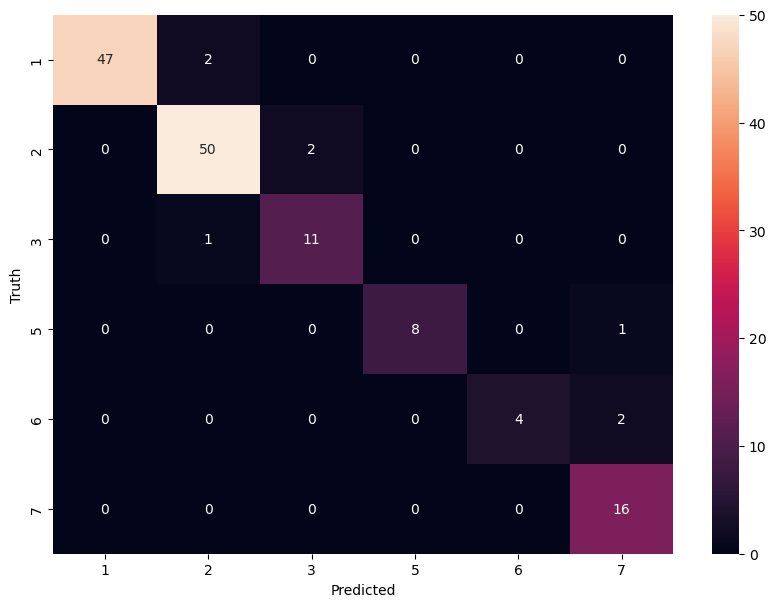

In [102]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6,random_state=91)

# 训练模型
clf.fit(Xtrain, ytrain)

# 预测测试集
y_pred = clf.predict(Xtest)

# 计算准确率
accuracy = accuracy_score(ytest, y_pred)
print(f'模型的准确率为：{accuracy}')
# 计算精度
precision = precision_score(ytest, y_pred, average='macro')
print(f'模型的精度为：{precision}')
# 计算召回率
recall = recall_score(ytest, y_pred, average='macro')

print(f'召回率为：{recall}')
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, xticklabels=np.unique(ytest), yticklabels=np.unique(ytest))
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()